# Laboratory Exercise 1 - Starter (2 points)

In this assignment, you will perform **web scraping** on the website [https://books.toscrape.com/](https://books.toscrape.com/).

Your tasks are as follows:

1. **Extract** `image_url`, `rating`, `title`, and `price` for the 20 books displayed on the main page.
2. **Organize the data** into a **pandas.DataFrame**.
3. **Visualize** the collected data according to the given requirements.

**Notes:**

- Some parts of the code are already provided. **Do not modify the existing code.**
- **Do not hard-code** any values or test data. There are hidden tests that will check your implementation.
- Write your solution only in the sections marked with `### YOUR SOLUTION`.
- Each task description indicates whether it is **automatically** or **manually graded**.
- You can verify automatically graded tasks using the cell labeled `### TEST` after each function.

***IMPORTANT NOTE:***
- Name your Jupyter Notebook as `lab_ex_1_{index}.ipynb`.
- For example, if your index is 123456, you should name your notebook as `lab_ex_1_12346.ipynb`.

In [10]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

In [81]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [11]:
url = "https://books.toscrape.com/"

In [12]:
response = requests.get(url)

In [13]:
response

<Response [200]>

In [47]:
response.encoding = "utf-8"

In [48]:
page_element = BeautifulSoup(response.text, "html.parser")

In [49]:
product_elements = page_element.select("article.product_pod")

**(0.2 points)** Implement the `get_image_url` function to return the image URL of a given product element using **BeautifulSoup**. For example, the first product on the page has the image URL `"media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"`.

In [105]:
### AUTOMATICALLY GRADED TASK
def get_image_url(product_element):
    "Get the URL of the image from the given product element using BeautifulSoup."
    img_urll = product_element.find("img") 
    src = img_urll.get("src")              #image_elements[0].get("src") av2
    return src.replace("../../", "")

Test your implementation by running the following cell.

In [106]:
### TEST
assert get_image_url(product_elements[0]) == "media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"

**(0.2 points)** Implement the `get_rating` function to return the product’s rating as an integer between 1 and 5. For example, the first product on the page has a rating of `3`.

In [107]:
### AUTOMATICALLY GRADED TASK
def get_rating(product_element):
    "Get the rating (1-5) of the given product element."

    # YOUR CODE HERE   energy_class av2,star rating e inspect elem,html p za klasa star r 
    star_rating = product_element.select_one("p.star-rating")
    rating_class = star_rating['class'][1]      #aa_bb cc ->so 1 zema cc
    rating_map = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}  #mapirame dictionary
    return rating_map[rating_class]

Test your implementation by running the following cell.

In [108]:
### TEST
assert get_rating(product_elements[0]) == 3

**(0.2 points)** Implement the `get_title` function to return the full title of the given product as a string. For example, the first product on the page has the title `"A Light in the Attic"`.

In [101]:
### AUTOMATICALLY GRADED TASK   "a light in..."
def get_title(product_element):
    "Get the full-length title of the given product element."

    # YOUR CODE HERE manufacturer_details.select_one(".opis-model").text  av2
    return product_element.h3.a["title"]
    

Test your implementation by running the following cell.

In [102]:
### TEST
assert get_title(product_elements[0]) == "A Light in the Attic"

**(0.2 points)** Implement the `get_price` function to return the product’s price as a float. For example, the first product on the page has a price of `51.77`.

In [103]:
def get_price(product_element):
    "Get the price of the given product element."

    # YOUR CODE HERE a2 curr_price_element = cells[0].select_one(".cena-box-naslovna") 51.77
    price_text = product_element.select_one("p.price_color").text
    return float(price_text.replace("£", ""))

Test your implementation by running the following cell.

In [104]:
### TEST
assert get_price(product_elements[0]) == 51.77

In [58]:
def get_attributes(product_element):
    return {
        "image_url": get_image_url(product_element),
        "rating": get_rating(product_element),
        "title": get_title(product_element),
        "price": get_price(product_element),
    }

In [59]:
get_attributes(product_elements[0])

{'image_url': 'media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg',
 'rating': 3,
 'title': 'A Light in the Attic',
 'price': 51.77}

In [60]:
product_data = [get_attributes(product_element) for product_element in product_elements]

In [61]:
df = pd.DataFrame(product_data)

In [62]:
df.head()

,image_url,rating,title,price
0,media/cache/2c/da/2cdad67c44b002e7ead0cc35693c...,3,A Light in the Attic,51.77
1,media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f...,1,Tipping the Velvet,53.74
2,media/cache/3e/ef/3eef99c9d9adef34639f51066202...,1,Soumission,50.10
3,media/cache/32/51/3251cf3a3412f53f339e42cac213...,4,Sharp Objects,47.82
4,media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c...,5,Sapiens: A Brief History of Humankind,54.23


***If you were not able to complete the previous tasks successfully, you may uncomment the following line to continue with the next steps.***

In [44]:
 #df = pd.read_csv("products.csv")

**(0.2 points)** Create a visualization showing the number of products for each rating (1-5).

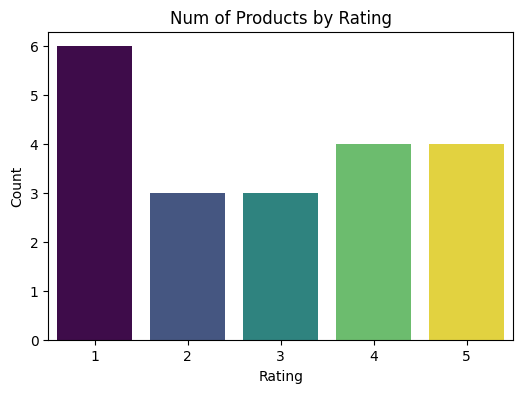

In [109]:
### MANUALLY GRADED TASK
def plot_counts_by_rating(df):
    "Plot the count of products by rating."""

    # YOUR CODE HERE av3 sns.boxplot(x="rating", y="price", data=df, palette="viridis")
    plt.figure(figsize=(6,4))
    sns.countplot(x="rating", hue="rating", data=df, palette="viridis", legend=False) #avtomatski broi kolku reda za rating  
    plt.title("Num of Products by Rating")
    plt.xlabel("Rating")
    plt.ylabel("Count")
    plt.show()

plot_counts_by_rating(df)

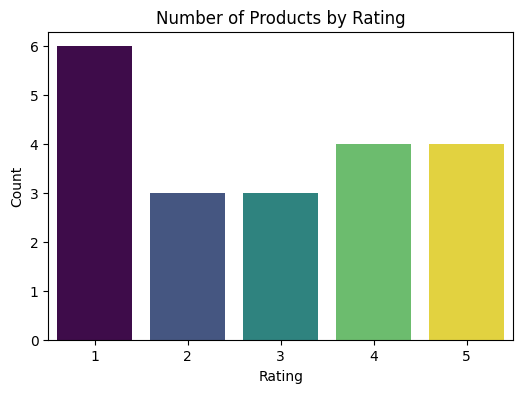

In [66]:
plot_counts_by_rating(df)

**(0.2 points)** Create a visualization showing the distribution of product prices.

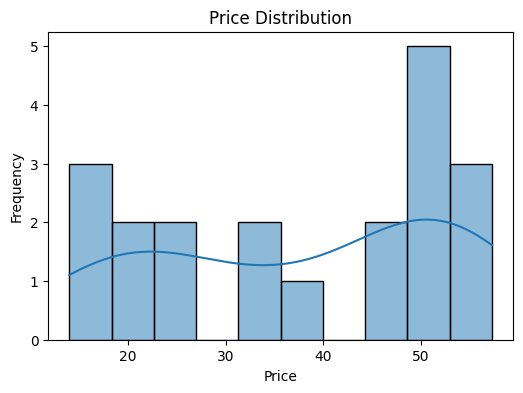

In [110]:
### MANUALLY GRADED TASK kolku ima books so niska visoka sredna cena
def plot_price_distribution(df):
    """Plot the price distribution of the products."""

    # YOUR CODE HERE numericko av3 age
    plt.figure(figsize=(6,4))
    sns.histplot(df["price"], kde=True, bins=10)
    plt.title("Price Distribution")
    plt.xlabel("Price")
    plt.ylabel("Frequency")
    plt.show()

plot_price_distribution(df)

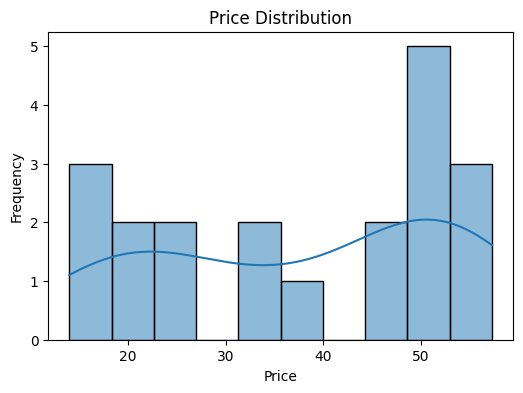

In [70]:
plot_price_distribution(df)

**(0.2 points)** Create a visualization showing the distribution of product title lengths.

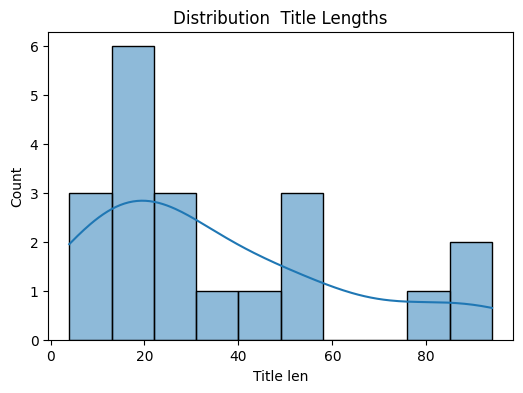

In [112]:
### MANUALLY GRADED TASK
def plot_title_length_distribution(df):
    """Plot the distribution of the title lengths."""

    # YOUR CODE HERE  NUMERICKO
    df["title_length"] = df["title"].apply(len)  #zema len
    plt.figure(figsize=(6,4))
    sns.histplot(df["title_length"], kde=True, bins=10)
    plt.title("Distribution  Title Lengths")
    plt.xlabel("Title len")
    plt.ylabel("Count")
    plt.show()

plot_title_length_distribution(df)

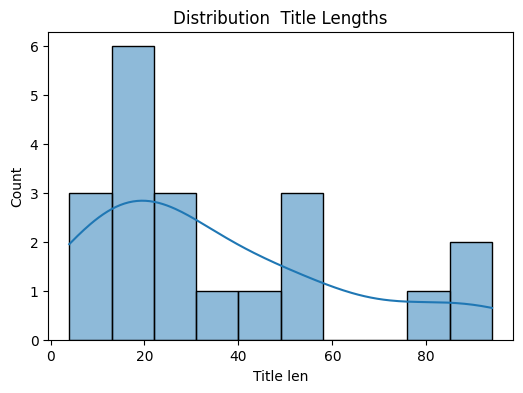

In [73]:
plot_title_length_distribution(df)

**(0.2 points)** Create box plots showing the distribution of product prices for each rating.

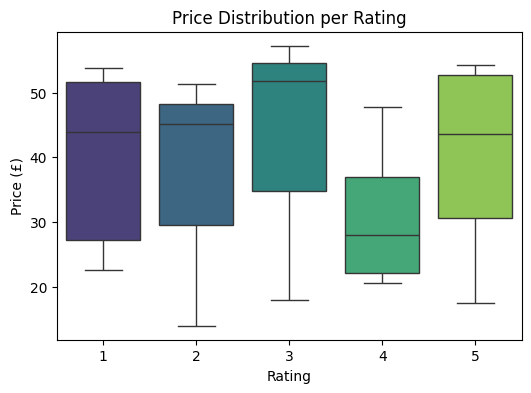

In [82]:
### MANUALLY GRADED ANSWER
def plot_price_distribution_per_rating(df):
    """Plot the price distribution of the products per rating."""

    # YOUR CODE HERE
    plt.figure(figsize=(6,4))
    sns.boxplot(x="rating", y="price", data=df, palette="viridis")
    plt.title("Price Distribution per Rating")
    plt.xlabel("Rating")
    plt.ylabel("Price (£)")
    plt.show()

plot_price_distribution_per_rating(df)

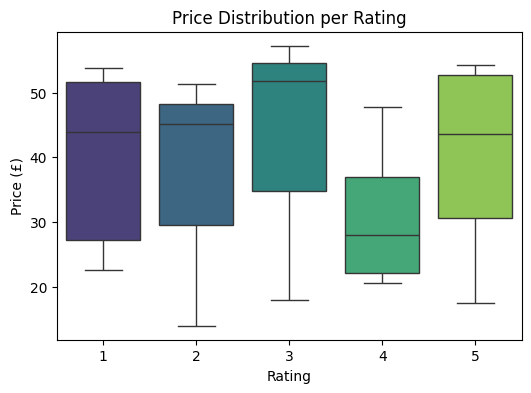

In [83]:
plot_price_distribution_per_rating(df)

**(0.2 points)** Create a heatmap showing the Pearson correlation between the numeric variables in the dataset.

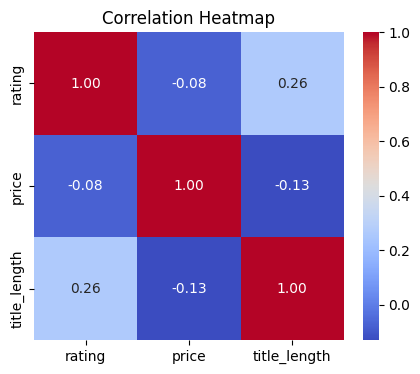

In [113]:
### MANUALLY GRADED ANSWER
def plot_corr_heat_map(df):
    """Plot the Pearson correlation between the numeric variables in the dataset using a heat map."""

    # YOUR CODE HERE book so visoka cena=pogolem rejting pr  av3 sns.heatmap(df.corr(numeric_only=True), annot=True)
    numeric_df = df.select_dtypes(include=["number"])
    corr = numeric_df.corr(method="pearson")
    plt.figure(figsize=(5,4))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

plot_corr_heat_map(df)

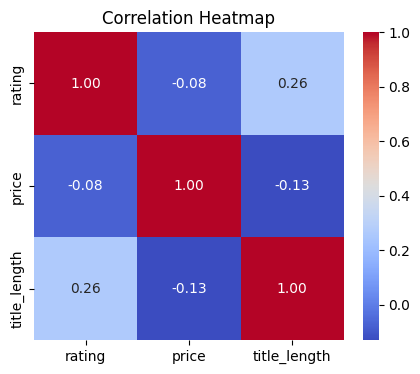

In [77]:
plot_corr_heat_map(df)

**(0.2 points)** Compute the `count`, `mean`, `std`, `min`, `25%`, `median`, `75%`, and `max` statistics of product prices grouped by rating (1-5).

In [117]:
### MANUALLY GRADED ANSWER
def compute_descriptive_stats_for_price_per_rating(df):
    """
    Compute the `count`, `mean`, `std`, `min`, `25% quantile`, `median`, `75% quantile`, and `max` statistics
    for the product's prices per rating (1-5). Return them as a `pandas.DataFrame`.
    """

    # YOUR CODE HERe  grupirav ceni po rejting,so describe=count,mean,m
    grouped = grouped = df["price"].groupby(df["rating"])
    stats=grouped.describe()
    return stats    #bez voa nema tabela

In [118]:
compute_descriptive_stats_for_price_per_rating(df)

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
1,6.0,40.018333,14.178174,22.65,27.3075,43.845,51.6375,53.74
2,3.0,36.830000,20.018382,13.99,29.5800,45.170,48.2500,51.33
3,3.0,42.316667,21.296472,17.93,34.8500,51.770,54.5100,57.25
4,4.0,31.105000,12.460865,20.66,22.1150,27.970,36.9600,47.82
5,4.0,39.750000,17.186613,17.46,30.6300,43.655,52.7750,54.23
